In [2]:
# Load necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Import datasets
data = pd.read_excel("Beijing_data.xlsx")

In [3]:
# Get number of observations and column number of data
# Get each column name in data
print(data.shape)

(318847, 33)


The dataset contains 318847 records and 33 features. <br>
We provide a brief description of datataset features. <br>
The original data description file and dataset can be downloaded from: 
__[Click Here](https://www.kaggle.com/ruiqurm/lianjia)__

- URL: the url which fetches the data
- ID: the id of transaction
- Lng and Lat: coordinates, using the BD09 protocol.
- CommunityID: community id
- TradeTime: the time of transaction
- DOM: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market
- Followers: the number of people follow the transaction.
- Total price: the total price
- Price per sqaure: the average price by square
- Square: the square of house
- Bedroom: the number of Bedroom
- Living Room: the number of living room
- Kitchen: the number of kitchen
- Bathroom the number of bathroom
- Floor: the height of the house.
- Floor Level: High, Medium and Low
- Building Type: including tower(1), bungalow(2), combination of plate and tower(3), plate(4)
- Construction time: the time of construction
- renovation condition: including other(1), rough(2), Simplicity(3), hardcover(4)
- building structure: including unknow(1), mixed(2), brick and wood(3), brick and concrete(4),steel(5) and steel-concrete composite(6)
- Ladder ratio: the proportion between number of residents on the same floor and number of elevator of ladder
- Property rights for five years: if the owner have the property for less than 5 years
- Subway: have subway (1) near house or not (0)
- District: 13 different district area in city of Beijing 
- Average price nearby: average housing price nearby each specific priority
- Fire Facilities: High, Meidum or Low
- Housing owership: regrading to chinese housing poclicy, each property has ownership of 70 years
- Number of Schools: number of primary and middle schools in each district
- Number of Hospital: number of hospitals in each district

In [4]:
data.columns

Index(['URL', 'ID', 'Lng', 'Lat', 'CommunityID', 'TradeTime', 'DOM',
       'Followers', 'Total price', 'Price per sqaure', 'Square', 'Bedroom',
       'Living Room', 'Kitchen', 'Bathroom', 'Floor', 'Floor Level',
       'Building Type', 'Construction time', 'renovation condition',
       'building structure', 'Ladder ratio', 'Elevator',
       'Property rights for five years（房屋满五年）', 'Subway', 'District',
       'Average price nearby', 'Fire Facilities', 'Garden', 'Pool',
       'Housing owership ', 'Number of Schools', 'Number of Hospital'],
      dtype='object')

# Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318847 entries, 0 to 318846
Data columns (total 33 columns):
URL                                      318847 non-null object
ID                                       318847 non-null object
Lng                                      318847 non-null float64
Lat                                      318847 non-null float64
CommunityID                              318847 non-null int64
TradeTime                                318847 non-null datetime64[ns]
DOM                                      160874 non-null float64
Followers                                318847 non-null int64
Total price                              318847 non-null int64
Price per sqaure                         318847 non-null int64
Square                                   318847 non-null float64
Bedroom                                  318815 non-null float64
Living Room                              318847 non-null object
Kitchen                                  318847 

Double check columns from 'Living Room' to 'building structure', since they are all showing 'object' as their data type

In [6]:
data.iloc[:,[12,13,14,15,16,17,18,19,20,25,26,27]].head()

,Living Room,Kitchen,Bathroom,Floor,Floor Level,Building Type,Construction time,renovation condition,building structure,District,Average price nearby,Fire Facilities
0,1,1,1,26,High,tower,2005,Simplicity,steel-concrete,Chaoyang,56021,High
1,2,1,2,22,High,tower,2004,Hardcover,steel-concrete,Chaoyang,71539,High
2,2,1,3,4,Medium,bungalow,2005,Simplicity,steel-concrete,Chaoyang,48160,Medium
3,1,1,1,21,Low,tower,2008,others,steel-concrete,Changping,51238,Low
4,1,1,1,6,Medium,bungalow,1960,rough,mixed,Dongcheng,62588,Medium


we will conduct conversion for some of variables type above

In [7]:
# print total number of null values and count for each column in data
print("Dataset ({} rows) null value:\n".format(data.shape[0]))
for col in data.columns:
    print(col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

Dataset (318847 rows) null value:

URL, Number of Missing Values: 0
ID, Number of Missing Values: 0
Lng, Number of Missing Values: 0
Lat, Number of Missing Values: 0
CommunityID, Number of Missing Values: 0
TradeTime, Number of Missing Values: 0
DOM, Number of Missing Values: 157973
Followers, Number of Missing Values: 0
Total price, Number of Missing Values: 0
Price per sqaure, Number of Missing Values: 0
Square, Number of Missing Values: 0
Bedroom, Number of Missing Values: 32
Living Room, Number of Missing Values: 0
Kitchen, Number of Missing Values: 0
Bathroom, Number of Missing Values: 0
Floor, Number of Missing Values: 0
Floor Level, Number of Missing Values: 1303
Building Type, Number of Missing Values: 2053
Construction time, Number of Missing Values: 0
renovation condition, Number of Missing Values: 32
building structure, Number of Missing Values: 32
Ladder ratio, Number of Missing Values: 0
Elevator, Number of Missing Values: 32
Property rights for five years（房屋满五年）, Number o

Pretty clean data! we will conduct data cleaning in the following steps:

- DOM: missing value represent it is still 'On Market'
- Bedroom: 32 missing values
- Floor Level: 1303 missing values comes from 'nan' values in 'Floor'
- Building Type: 2053 missing vlaues, double check what's going on
- There are 32 missing vlaues for renovation condition, building structure, Property rights for five years, Subway, we assume there are exactly 32 properties does not conduct these variables, we will exclude them
- Average price nearby: 463 missing values, hard to estimate or filling, delete
- Fire Facilities: 1303, convert them to 'Low'

In [8]:
# change variable name due to language barry
data = data.rename(columns={'Property rights for five years（房屋满五年）': 'Property rights for five years'})

# EDA

Exploratory data analysis is an important step below we dig-deep into predictive analysis, we conduct data visualization with statistical inference to show insights in our data.<br>
1. Analysing 'Total price' with descriptive statistics summary
2. I would like to see each predictors' (include dependent variable) correlation, just to check if there are any highly correlated features<br>
3. Then, I would like to make 'Total price' correlation martrix to see any particular strong correlated predictors with dependent variable and check co-linearlity<br>
4. Next, We will dig-deep more to see any strongly correlated features with scatter plot<br>

In [9]:
data['Total price'].describe()

count    318847.000000
mean       3490.319943
std        2307.815378
min           1.000000
25%        2050.000000
50%        2940.000000
75%        4255.000000
max      181300.000000
Name: Total price, dtype: float64

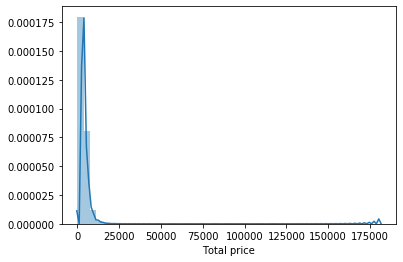

In [10]:
# Histogram 
sns.distplot(data['Total price'])
plt.show()

- Deviate from the normal distribution
- Have appreciable positive skewness
- Show peakedness

In [ ]:
# Skewness and kurtosis
print("Skewness: %f" % data['Total price'].skew())
print("Kurtosis: %f" % data['Total price'].kurt())
# We do have some extreme values for properties: 四合院 (Siheyuan)
# Some of 'Siheyuan' are for sell, but we will not include them in this dataset

In [12]:
# Add one column which defines number of shopping malls in each district
# Number of Shopping mall is directly search from Google Map

def Shaopping_mall(District):
    if(District == "Chaoyang"):
        return 9
    elif(District == "Dongcheng"):
        return 7
    elif(District == "Xicheng"):
        return 6
    elif(District == "Haidian"):
        return 8
    elif(District == "Yizhuang"):
        return 1
    elif(District == "Fangshan"):
        return 1
    elif(District == "Daxing"):
        return 1
    elif(District == "Shunyi"):
        return 1
    return 0
data['Number of Shopping malls'] = data['District'].apply(Shaopping_mall).astype(int)
print("Unique Values in the Column:", np.unique(data['Number of Shopping malls']))

Unique Values in the Column: [0 1 6 7 8 9]


In [13]:
print(data['Lng'].max(), data['Lng'].min())
print(data['Lat'].max(), data['Lat'].min())

116.732378 116.072514
40.252758 39.62703


(40.252758, 39.62703)

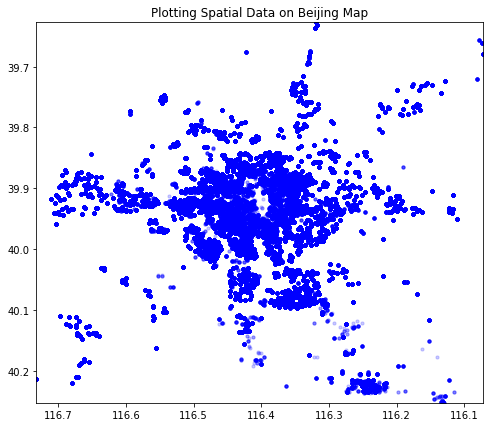

In [14]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(data['Lng'], data['Lat'], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Beijing Map')
ax.set_xlim(116.732378,116.072514)
ax.set_ylim(40.252758,39.62703)

Correlation Matrix

- Covert 'Living Room','Kitchen','Bathroom','Floor','Construction time','Average price nearby' to numeric
- Dummy variable for 'Floor Level','Building Type','Renovation Condition','Building Structure','District','Fire Facilities'
- Remove unnecessary variables

In [15]:
# convert numeric
convert_numeric_list = data.iloc[:,[12,13,14,15,18,26]]
for i in convert_numeric_list:
    data[i] = pd.to_numeric(data[i], errors='coerce')

In [16]:
# convert dummy 
convert_dummy_list = data.loc[:,['Floor Level','Building Type','renovation condition','building structure','District','Fire Facilities']]
df_dummies = pd.get_dummies(convert_dummy_list, drop_first=True)
df_dummies.head()

,Floor Level_Low,Floor Level_Medium,Building Type_combination of plate and tower,Building Type_plate,Building Type_tower,renovation condition_Simplicity,renovation condition_others,renovation condition_rough,building structure_brick and wood,building structure_mixed,...,District_Fengtai,District_Haidian,District_Mentougou,District_Shijingshan,District_Shunyi,District_Tongzhou,District_Xicheng,District_Yizhuang,Fire Facilities_Low,Fire Facilities_Medium
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# merge dummy variables with dataset
data = pd.concat([data,df_dummies], axis = 1)
data.shape

(318847, 61)

In [18]:
# Avoding the Dummy variable Trap
data = data.drop(['Building Type_tower','renovation condition_Simplicity',
                'building structure_unknow','District_Yizhuang','Fire Facilities_Low'],axis=1)

In [19]:
# remove orginial variables 
data = data.drop(['Floor Level','Building Type','renovation condition','building structure','District','Fire Facilities'],axis=1)
data.shape

(318847, 50)

remove all unnecessary variables:

- URL: neither numeric vairbale nor useful for modeling
- ID: it's a unqiue value for each transaction, need to wipe out
- CommunityID: unqiue identify each Community ID
- TradeTime: Timestamp data
- Housing Owership: the values in this columns are all 70
- Price per sqaure & Square: Price per sqaure times square equals to total price, which we will leave our dependet variable 
- Floor Level_Low & Floor Level_Medium: although they are dummy variables already, but because they are highly correlated with 'Floor', so better decision is to leave most likely the orginial data

In [20]:
data['TradeTime_year'] = data['TradeTime'].dt.year
data['TradeTime_month'] = data['TradeTime'].dt.month
data['TradeTime_day'] = data['TradeTime'].dt.day

In [21]:
data = data.drop(['URL','ID','CommunityID','TradeTime','Housing owership ',
                  'Price per sqaure','Square','Floor Level_Low','Floor Level_Medium'],axis=1)
data.shape

(318847, 44)

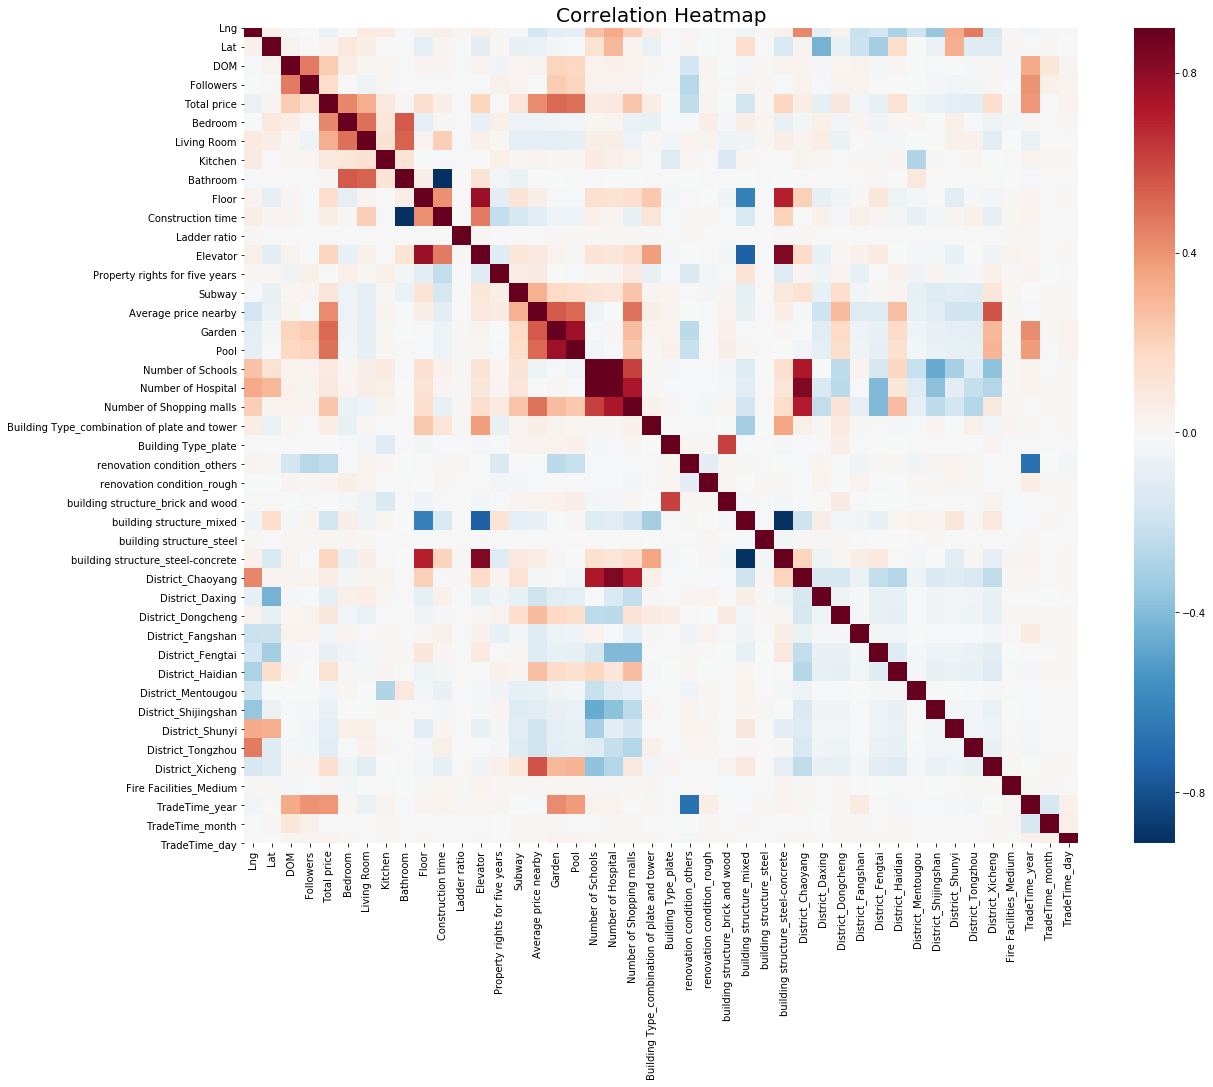

In [22]:
# correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20,15))
ax.set_title('Correlation Heatmap',fontsize=20)
sns.heatmap(corrmat, vmax=0.9,cmap="RdBu_r", square=True)
plt.show()

Becuase there are many features in this data, so I would directly compare each predictors with 'Total price' base on time consuming<br>

Serveal high corrleated features are: <br>
'DOM','Followers','Total price','Price per sqaure','Square','Bedroom', 'Living Room','Kitchen','Floor','Elevator','Average price nearby','Garden','Pool','Number of Schools','Number of Hospital','Number of Shopping malls','renovation condition_Simplicity','renovation condition_others','District_Daxing','District_Chaoyang','District_Dongcheng','District_Haidian','District_Xicheng','TradeTime_year'

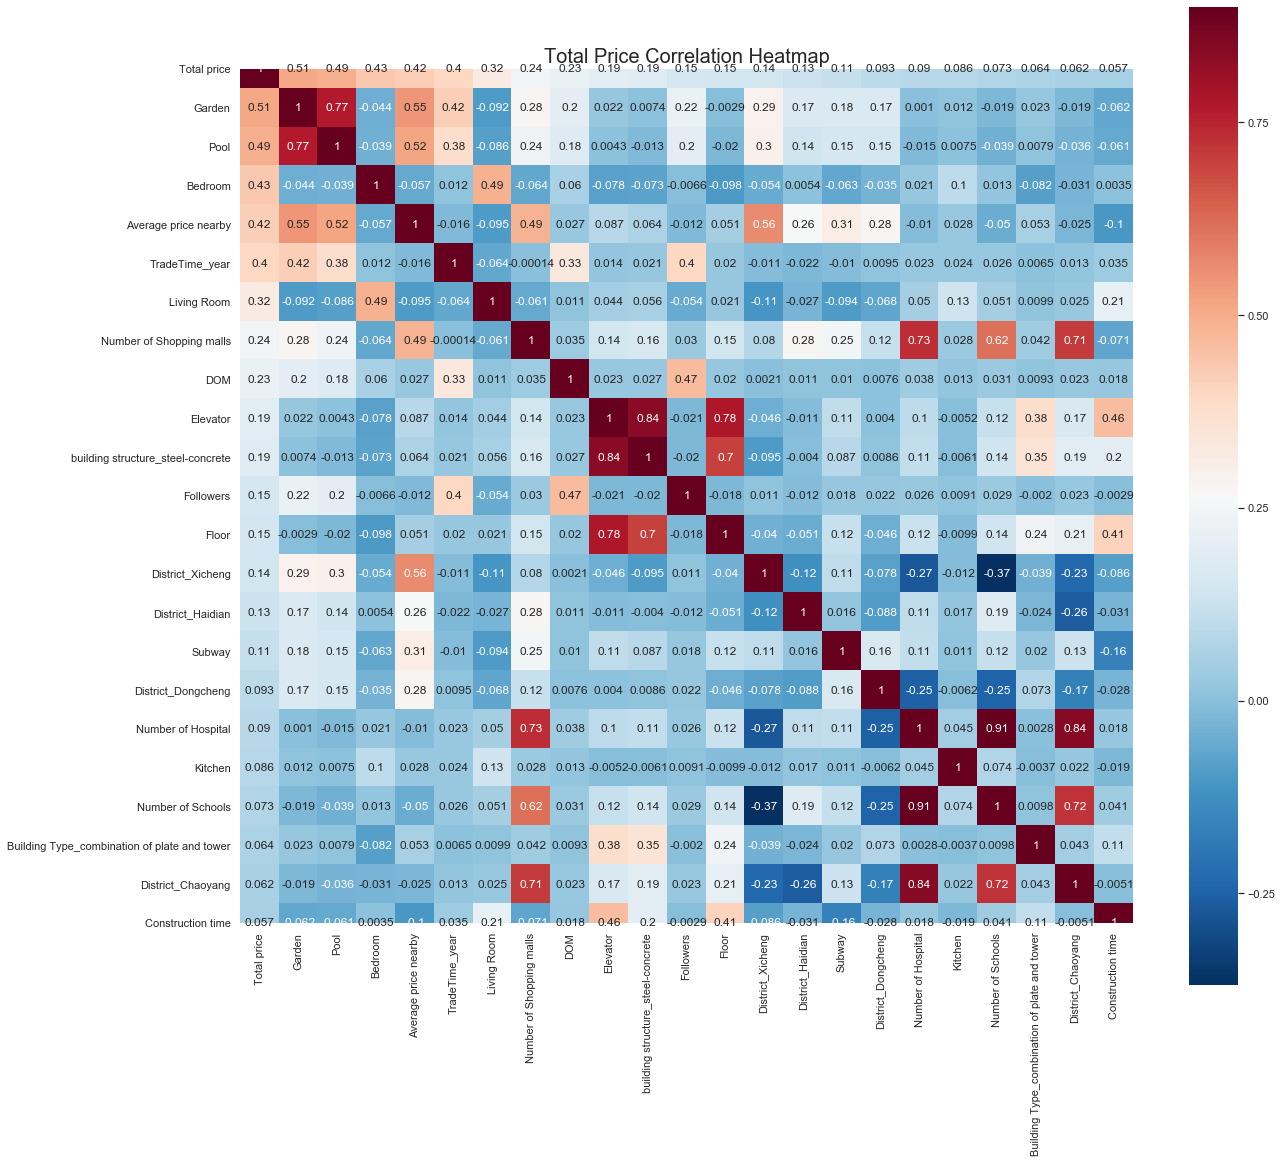

In [23]:
# 'Total price' correlation matrix
k = 23
cols = corrmat.nlargest(k, 'Total price')['Total price'].index
corrmat2 = data[cols].corr()

sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20,18))
ax.set_title('Total Price Correlation Heatmap',fontsize=20)
sns.heatmap(corrmat2,vmax=0.9, annot=True, cmap="RdBu_r", square=True)
plt.show()

According to our Total price correlation heatmap, there are some variables most correlated with 'Total price'. Our thoughts on this: <br>

top 3 correlated: 'Garden', 'Pool' and 'Bedrooms'<br>

- 'Garden' and 'Pool' strongly correlated with each other about 0.77, represent high-end proprities and communities
- 'Elevator' and 'building strcture_steel_concrete' strongly correlated with each other: 0.84, why?
- 'Elevator' and 'Floor' storngly correlated with each other: 0.78, the higher floor you live, the more you care about the elevator
- 'Floor' and 'building strcture_steel_concrete' strongly correlated with each other: 0.78, obviously because floor is highly correlated with elevator
- 'Number of shopping malls' and 'numebr of hosptials' stongly correlated with each other: 0.73, represent high resident population district
- 'Number of hospital' and 'Number of schools' strongly correlated with each other: 0.91, represent odler district in Beijing, where older people live with historic schools<br>


- <b>Interesting fact: We can tell that district_Chaoyang has the highest correlation with schools, hospitals and shopping malls. But many famous schools and hospitals are in district_Haidian. This happens because schools in this dataset only count primary and middle schools (include international schools) whereas famous schools in Haidian are universities.</b>

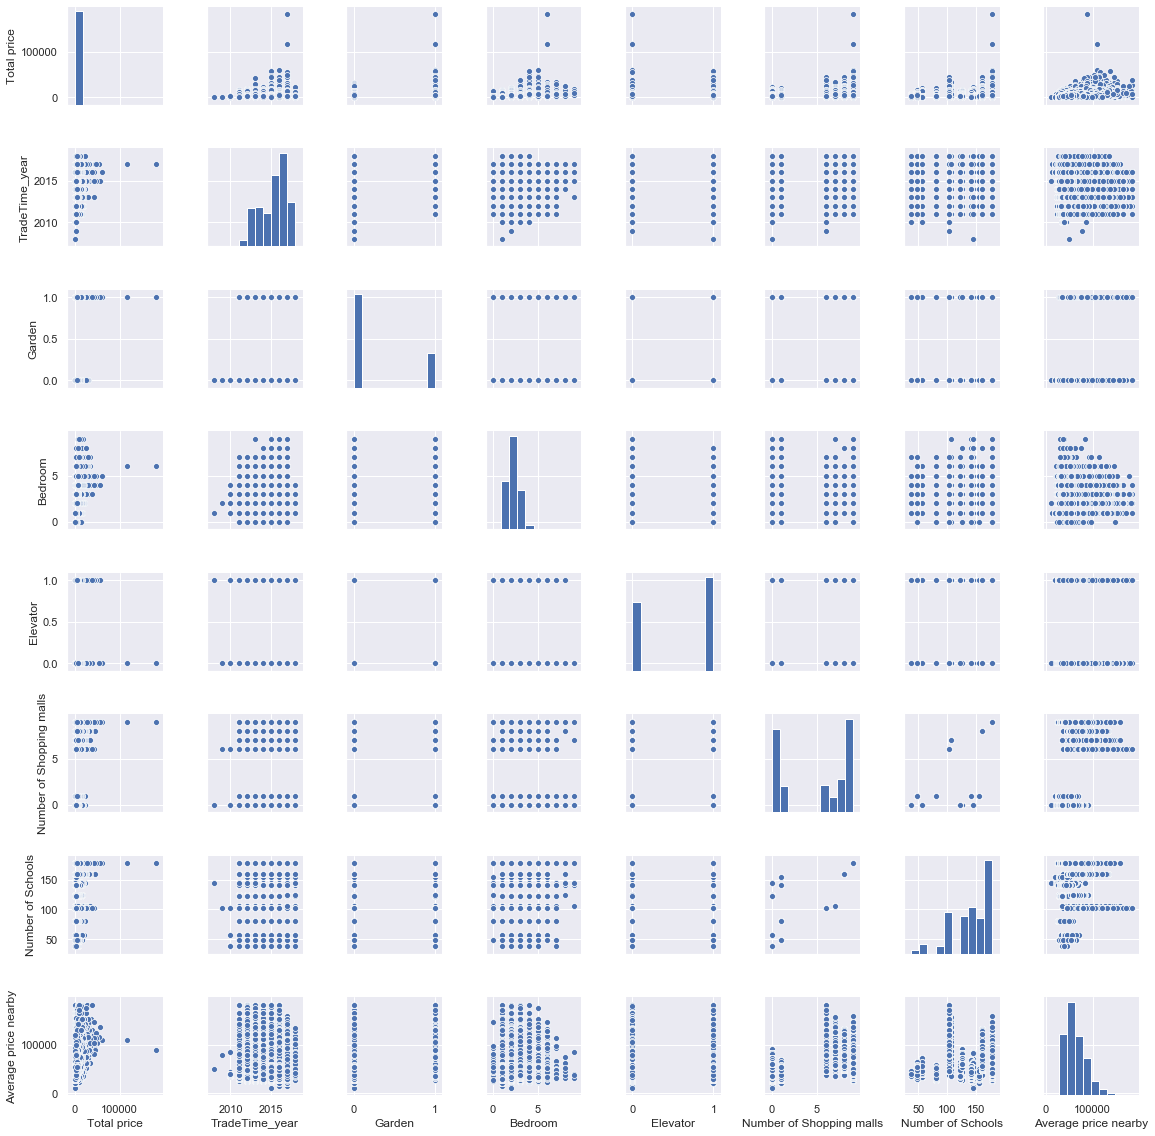

In [24]:
# scatter plot
sns.set()
cols = ['Total price','TradeTime_year','Garden','Bedroom','Elevator','Number of Shopping malls',
       'Number of Schools', 'Average price nearby']
sns.pairplot(data[cols], size=2)
plt.show()

Unfortunately, we cannot detect linear relationship for almost all variables in the scatter plot. We are only able to see the distribution for each variable. For example:

- More properties are sold during 2013 to 2017, and total price are below 20,000K
- 'Garden' is a dichotomous variable, contains 1 or 0
- For most properties, it has 3-5 bedrooms and total price are below 20,000K
- Number of shipping malls has 2 categories, whether there are more than 5 shopping malls in a district or there are none or 1
- Number of schools may vary between each district, but the one with the most schools has higher total price of property
- For most properties, the higher average price nearby the higher total price is

# Data Cleaning

Important question when thinking about missing data:

- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

Basically, our data is pretty clean and we need to ensure that the missing data process is not biased and hidding an inconvenient truth. We will conduct data cleaning for the following variables:  <br>

In [25]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1,keys=['Total','Percent'])
missing_data.head(11)

,Total,Percent
DOM,157973,0.495451
Construction time,19283,0.060477
Average price nearby,464,0.001455
Subway,32,0.000100
Bedroom,32,0.000100
Living Room,32,0.000100
Kitchen,32,0.000100
Floor,32,0.000100
Elevator,32,0.000100
Property rights for five years,32,0.000100


In [26]:
# dealing with missing data
data = data.drop(data.loc[data['Floor'].isnull()].index)
data = data.drop(data.loc[data['Construction time'].isnull()].index)
data = data.drop(data.loc[data['Average price nearby'].isnull()].index)

In [27]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
DOM,145977,0.487832
TradeTime_day,0,0.000000
Ladder ratio,0,0.000000
Number of Hospital,0,0.000000
Number of Schools,0,0.000000
Pool,0,0.000000
Garden,0,0.000000
Average price nearby,0,0.000000
Subway,0,0.000000
Property rights for five years,0,0.000000


For predictor 'DOM', we do consider it as an important predictor. It has 0.23 correlation coefficient with 'Total price'. But at this circumstance, we will wipe out all missing values for 'DOM', reasons are list below:

- It contains nearly <b>50%</b> of missing values 
- No matter how we filling the missing values, like median or mean value. It will eventually lead us to wrong pattern
- We tried regression model without 'DOM', the accruacy is not expected


In [28]:
data = data.drop(data.loc[data['DOM'].isnull()].index)

Lastly, as we can see, a large part of the feature 'Days on Market' (DOM) is missing. - Missing value for 'DOM' count <b>0.48 percent</b> of total. Therefore we are going to impute the missing data. The first step is analyzing the "DOM" feature in order to know how the best approach


# Outliers

If we just take a quick look at the smmary table below, we can easily find out there are two columns contain outliers:

- 'Ladder ratio': way bigger than .75 quantile
- 'Total price': way bigger than .75 quantile

But we will take dig-deep with 1.5*IQR to detect outliers and
we will try to correct and remove outliers with z value or 1.5*IQR
<b>However, If the technic does not work well, we will manually check and remove any self-defined outliers</b>

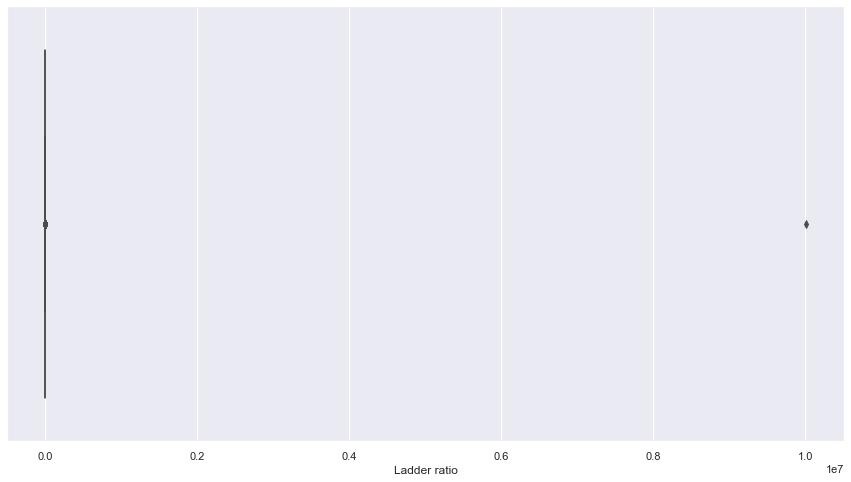

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(data['Ladder ratio'])

In [30]:
outlier_LR = data.sort_values(['Ladder ratio'],ascending=False)
outlier_LR['Ladder ratio'].head(1)

61036    10009400.0
Name: Ladder ratio, dtype: float64

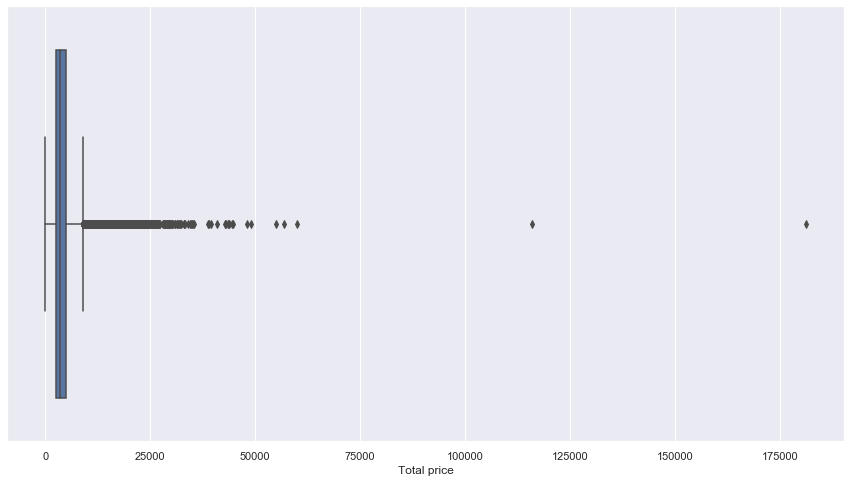

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(data['Total price'])

In [32]:
outlier_TP = data.sort_values(['Total price'],ascending=False)
outlier_TP['Total price'].head(5)

67868     181300
65440     116000
23183      60000
161030     57000
63778      55000
Name: Total price, dtype: int64

In [33]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lng,153259.0,116.414321,0.113940,116.072514,116.343245,116.416156,116.476545,1.167324e+02
Lat,153259.0,39.948195,0.095662,39.627030,39.891691,39.933860,40.002169,4.025276e+01
DOM,153259.0,29.529639,50.556247,1.000000,1.000000,7.000000,38.000000,1.677000e+03
Followers,153259.0,26.939932,44.523251,0.000000,2.000000,12.000000,33.000000,1.143000e+03
Total price,153259.0,4123.884196,2631.093483,1.000000,2478.000000,3550.000000,5050.000000,1.813000e+05
Bedroom,153259.0,2.017545,0.781252,0.000000,1.000000,2.000000,2.000000,9.000000e+00
Living Room,153259.0,1.148096,0.512764,0.000000,1.000000,1.000000,1.000000,5.000000e+00
Kitchen,153259.0,0.991792,0.117660,0.000000,1.000000,1.000000,1.000000,3.000000e+00
Bathroom,153259.0,1.187173,0.441259,0.000000,1.000000,1.000000,1.000000,7.000000e+00
Floor,153259.0,13.229089,7.817188,1.000000,6.000000,11.000000,19.000000,6.300000e+01


As we try to remove outliers with IQR (as the code showing below), the data records drops 40121 records. But we got pretty clean data! What's going on? We have to take a look
```
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR))|(data > (Q3 + 1.5 * IQR))).any(axis=1)]
```

In [34]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Lng                                                 0.133300
Lat                                                 0.110478
DOM                                                37.000000
Followers                                          31.000000
Total price                                      2572.000000
Bedroom                                             1.000000
Living Room                                         0.000000
Kitchen                                             0.000000
Bathroom                                            0.000000
Floor                                              13.000000
Construction time                                  12.000000
Ladder ratio                                        0.250000
Elevator                                            1.000000
Property rights for five years                      1.000000
Subway                                              1.000000
Average price nearby                            29650.000000
Garden                  

Here is what happend. If we define any records below -1.5IQR or above +1.5IQR as outliers to be remove, which means we defined the following condiitons as outliers:<br>

- any property with more than 1 living room
- any property with more then 2 bedroom
- any property with more than 1 kitchen
- any property with more than 1 bathroom
- any property with more than 0 pool, etc

This is a tradeoff, whether you followed 1.5IQR with deletion of 40121 records or we can manually deleted any records from 'Ladder ratio' and 'Total Price' following 99% quantile. In this condiiton, we choose the later one

In [35]:
# Double check outliers by compare any value in 'Ladder ratio' and 'Total Price' with .99 quantile
print(data['Ladder ratio'].quantile(0.99))
print(data['Total price'].quantile(0.99))

1.0
13700.0


Any value greater than 1.0 in column 'Ladder ratio' will be define as an outlier<br>
Any value greater than 12000.0 in column 'Total price' will be define as an outlier

In [36]:
"""
data.drop(data[data['Total price'] == 181300].index, inplace=True)
data.drop(data[data['Total price'] == 116000].index, inplace=True)
data.drop(data[data['Ladder ratio'] == 10009400.0].index, inplace=True)
"""

outliers_labber = data[data['Ladder ratio'] > data['Ladder ratio'].quantile(0.99)]
outliers_price = data[data['Total price'] > data['Total price'].quantile(0.99)]

In [37]:
data = data[data['Ladder ratio'] <= data['Ladder ratio'].quantile(0.99)]
data = data[data['Total price'] <= data['Total price'].quantile(0.99)]

In [38]:
# Double check the summary of each column one last time
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lng,151200.0,116.414373,0.114336,116.072514,116.343245,116.416156,116.476546,116.732378
Lat,151200.0,39.948218,0.096034,39.627030,39.891491,39.933840,40.002211,40.252758
DOM,151200.0,29.159001,49.906719,1.000000,1.000000,7.000000,38.000000,1677.000000
Followers,151200.0,26.943856,44.591234,0.000000,2.000000,12.000000,33.000000,1143.000000
Total price,151200.0,3983.048743,2141.350398,1.000000,2460.000000,3530.000000,5000.000000,13600.000000
Bedroom,151200.0,2.002130,0.765302,0.000000,1.000000,2.000000,2.000000,9.000000
Living Room,151200.0,1.140522,0.507794,0.000000,1.000000,1.000000,1.000000,5.000000
Kitchen,151200.0,0.991263,0.115798,0.000000,1.000000,1.000000,1.000000,3.000000
Bathroom,151200.0,1.174782,0.417715,0.000000,1.000000,1.000000,1.000000,6.000000
Floor,151200.0,13.185258,7.808909,1.000000,6.000000,11.000000,19.000000,63.000000


In [39]:
# data.to_csv(r'/Users/oliverdong/Desktop/Conestoga_college_F19/Programming_in_big_data/Project/clean_data.csv')

### Split test dataset

In [3]:
# Import dataset
data = pd.read_csv("clean_data.csv")

In [4]:
# drop unnecssary columns
data = data.drop(['Unnamed: 0'],axis=1)
print(data.shape)

(151200, 44)


In [5]:
# split 5% to test data, leave the rest 95% to the train data
test_data = data.sample(frac=0.05)
duplicates = set(data.index).intersection(test_data.index)
data = data.drop(duplicates, axis=0)
print(data.shape)

(143640, 44)


In [6]:
# drop traget variable in test dataset
test_data = test_data.drop(['Total price'],axis=1)
print(test_data.shape)

(7560, 43)


In [7]:
# write test_data
# test_data.to_csv(r'/Users/oliverdong/Desktop/Conestoga_college_F19/Programming_in_big_data/Project/test_data.csv')

In [8]:
# dependent variable
prices = data['Total price']
# predictors
features = data.drop('Total price', axis = 1)
# Success
print("Beijing housing dataset has {} data points with {} variables each.".format(*data.shape))
print("Features has {} data points with {} variables each.".format(*features.shape))

Beijing housing dataset has 143640 data points with 44 variables each.
Features has 143640 data points with 43 variables each.


In [9]:
print("Features has {} data points with {} variables each.".format(*features.shape))

Features has 143640 data points with 43 variables each.


### Implementation: Shuffle and Split Data
For the next implementation it is required to take the Beijing housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [10]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.05, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Multvariate Linear Regression

In [11]:
# Fitting Multiple Linear Regression to the Training set
# baseline model
from sklearn.linear_model import LinearRegression
LR_regressor = LinearRegression()
LR_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
LR_regressor.score(X_train,y_train)

0.7685590790350594

### Backward Elimination

In [13]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm
# append intercept to features
features = np.append(arr = np.ones((143640,1)).astype(int), values = features, axis=1)

features_opt = features[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
                          19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
                          35,36,37,38,39,40,41,42,43]]
regressor_OLS = sm.OLS(endog = prices, exog = features_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                 1.163e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:27:22   Log-Likelihood:            -1.2002e+06
No. Observations:              143640   AIC:                         2.400e+06
Df Residuals:                  143598   BIC:                         2.401e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.07e+06   9296.906   -115.079      0.000   -1.09e+06   -1.05e+06
x1          -116.5900     57.341     -2.033      0.042    -228.977      -4.203
x2           280.8566     66.221      4.241      0.000     151.065     410.648
x3             2.2425      0.064     34.923      0.000       2.117       2.368
x4            -1.5000      0.072    -20.885      0.000      -1.641      -1.359
x5           925.8805      4.603    201.132      0.000     916.858     934.903
x6           547.0612      6.683     81.855      0.000     533.962     560.160
x7          -262.2973     26.319     -9.966      0.000    -313.881    -210.713
x8           788.9171      8.548     92.290      0.000     772.163     805.672
x9            11.0178      0.583     18.897      0.000       9.875      12.160
x10           38.9315      0.442     88.132      0.000      38.066      39.797
x11         1331.0295     20.048     66.392      0.000    1291.736    1370.323
x12          244.4833     12.008     20.360      0.000     220.948     268.018
x13           93.7541      5.907     15.872      0.000      82.177     105.332
x14           51.3285      6.176      8.311      0.000      39.223      63.434
x15            0.0366      0.000    140.534      0.000       0.036       0.037
x16          667.1458      9.499     70.237      0.000     648.529     685.763
x17          672.6547     10.054     66.905      0.000     652.949     692.360
x18         1561.5066     13.645    114.438      0.000    1534.763    1588.250
x19        -2.605e+04    227.735   -114.376      0.000   -2.65e+04   -2.56e+04
x20        -6397.6856     55.695   -114.871      0.000   -6506.846   -6288.525
x21          -67.0861      7.751     -8.655      0.000     -82.279     -51.893
x22        -1175.8762    301.101     -3.905      0.000   -1766.028    -585.725
x23          181.8719      7.969     22.821      0.000     166.252     197.492
x24         -341.2510     19.253    -17.725      0.000    -378.986    -303.515
x25         -150.4358    226.071     -0.665      0.506    -593.530     292.658
x26           50.8100     13.794      3.683      0.000      23.773      77.847
x27          292.5017    103.842      2.817      0.005      88.973     496.031
x28          152.3020     16.871      9.028      0.000     119.236     185.369
x29         1.351e+05   1174.305    115.053      0.000    1.33e+05    1.37e+05
x30        -6.709e+04    578.363   -116.000      0.000   -6.82e+04    -6.6e+04
x31        -2.584e+04    230.099   -112.309      0.000   -2.63e+04   -2.54e+04
x32        -3.731e+04    306.911   -121.576      0.000   -3.79e+04   -3.67e+04
x33        -1.263e+05   1100.714   -114.773      0.000   -1.28e+05   -1.24e+05
x34         5.257e+04    459.064    114.526      0.000    5.17e+04    5.35e+04
x35        -4.246e+04    361.577   -117.420      0.000   -4.32e+04   -4.17e+04
x3

### Learning Curves

The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

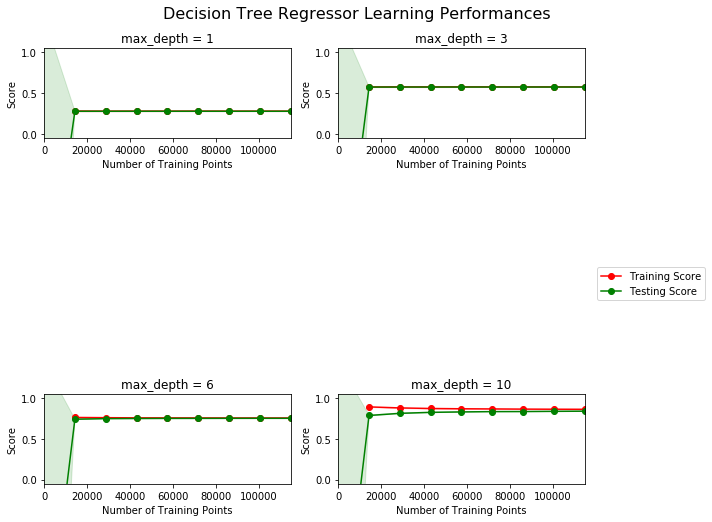

In [14]:
import visuals as vs
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

If we take a close look at the graph with the max depth of 10:

- As the number of training points increases, the training score stay stable and the test score slightly increases
- As both scores (training and testing) tend to converge, from the 80000 points treshold, having more training data points will not benefit the model

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

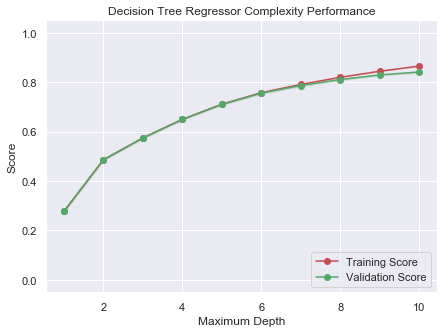

In [54]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

If we analize how the bias-variance vary with the maximun depth, we can infer that:

- With the maximun depth of ten, the graphic shows that the model learn perfectly well from training data (with a score close to one) and also returns poor results on test data, which is an indicator of overfitting, not being able to generalize well on new data. This is a problem of High Variance. To improve performance, in this case, we will add learning curve to see if we can get more precise model

### Implementation: Fitting a Model
The final implementation requires that we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, we will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.


### Decision Tree Regression

In [19]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [56]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [57]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

In [58]:
# Fit the training data to the model using grid search
decisiontree_regressor = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(decisiontree_regressor.get_params()['max_depth']))

Parameter 'max_depth' is 13 for the optimal model.


In [60]:
dt_predicted_price = decisiontree_regressor.predict(X_test)
decisiontree_r2 = performance_metric(y_test, dt_predicted_price)
print ("Optimal model has R^2 score {:,.2f} on test data".format(decisiontree_r2))

Optimal model has R^2 score 0.87 on test data


In [97]:
dt_predicted_price[[0,1,2,3,4]]

array([1130.        , 2386.62621359, 4596.46706587, 5064.54934211,
       3399.06896552])

In [98]:
y_test.head(5)

141590     960
10685     2100
71159     3880
118923    4980
18489     3130
Name: Total price, dtype: int64

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**The code cell below run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [67]:
# Import supplementary visualizations code visuals.py
import visuals as vs

In [68]:
client_data = [[116.473987,39.998614,95,25,2,1,1,2,19,2002,1,1,1,1,87262,
               1,1,178,16,9,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2016,9,10]]

In [83]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $8,696.08
Trial 2: $9,005.51
Trial 3: $8,897.97
Trial 4: $8,698.98
Trial 5: $9,223.14
Trial 6: $8,660.76
Trial 7: $9,008.53
Trial 8: $8,601.04
Trial 9: $9,357.58
Trial 10: $8,670.55

Range in prices: $756.54


### Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [17]:
def fit_model(X, y):
    cross_validator = KFold(n_splits=10, random_state=1, shuffle=True)

    regressor = RandomForestRegressor()
    
    params = { 'max_depth': range(1,21) }
    
    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cross_validator)
    grid = grid.fit(X, y)

    return grid.best_estimator_

In [20]:
# Fit the training data to the model using grid search
randomforest_regressor = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(randomforest_regressor.get_params()['max_depth']))

Parameter 'max_depth' is 19 for the optimal model.


In [88]:
rf_predicted_price = randomforest_regressor.predict(X_test)
randomforest_r2 = performance_metric(y_test, rf_predicted_price)
print ("Optimal model has R^2 score {:,.2f} on test data".format(randomforest_r2))

Optimal model has R^2 score 0.91 on test data


In [96]:
rf_predicted_price[[0,1,2,3,4]]

array([1082.5       , 2280.1454137 , 4403.36421052, 5190.95729831,
       3077.63928571])

In [95]:
y_test.head(5)

141590     960
10685     2100
71159     3880
118923    4980
18489     3130
Name: Total price, dtype: int64

In [99]:
# predict on actual test_data
randomforest_regressor.predict(test_data.head())

array([4922.99285714, 4003.        , 1966.80680828, 3171.69538913,
       5124.89664887])

# Modeling - Predicting DOM

In [100]:
# Reload dataset
data = pd.read_csv("clean_data.csv")

In [101]:
# drop unnecssary columns
data = data.drop(['Unnamed: 0'],axis=1)
print(data.shape)

(151200, 44)


___
<div>
<img src='Average_DOM_pre_year.png' width="500"/></a>
</div>
___

The average DOM for properties increased dramatically from starting of 2015 to 2018. This is becuase of the "purchase restriction order", refers to the government's housing purchase restriction policy, which was issued on April 30, 2010 in the China's "National Ten Regulations". <br>

<b>From May 1, 2010, Beijing families can only purchase a new set of commerical housing and puchase a house.</b> When buying a house, people also need to fill out a "Familt Member Status Declaration Form". We will filter all data form 2010 to 2015 to predict DOM.

In [102]:
# Filter data from 2010-2015
data = data.loc[data['TradeTime_year'].isin([2010,2011,2012,2013,2014,2015])]

In [103]:
data.shape

(45810, 44)

In [104]:
# dependent variable
dom = data['DOM']
# predictors
features = data.drop('DOM', axis = 1)
# Success
print("Beijing housing dataset has {} data points with {} variables each.".format(*data.shape))
print("Features has {} data points with {} variables each.".format(*features.shape))

Beijing housing dataset has 45810 data points with 44 variables each.
Features has 45810 data points with 43 variables each.


In [105]:
print("Features has {} data points with {} variables each.".format(*features.shape))

Features has 45810 data points with 43 variables each.


In [106]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, dom, test_size=0.05, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Multvariate Linear Regression

In [107]:
# baseline model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
regressor.score(X_train,y_train)

0.0017341188726853751

# References:

- http://www.phic.org.cn/tjsj/wstjjb/2018nianjianbian/20190326.pdf (p23)
- http://www.ysxiao.cn/c/201712/16395.html (p1)
- http://www.ysxiao.cn/c/201712/16302.html (p1)
- https://knoema.com/atlas/China/topics/Crime-Statistics 
- https://knoema.com/atlas/China/topics/Education
- https://knoema.com/atlas/China/topics/Health
- Crime Rate Report PDF: please see the attachment file (Credit to Beijing Normal University - Department of Resources and Enviornment Science)
- Google map for shopping mall in each district